# Recommender system for a medical supplies company

<img src="https://media.springernature.com/lw685/springer-static/image/art%3A10.1186%2Fs12911-021-01553-3/MediaObjects/12911_2021_1553_Fig1_HTML.png" width = 600>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

from termcolor import colored

pd.set_option("display.max_columns", 200)
pd.set_option("display.max_rows", 200)

import warnings
warnings.filterwarnings("ignore")

## Load data and EDA

In [2]:
df = pd.read_csv("PBL 5 recommendation data.csv", encoding = "Latin-1")
df.sample(7)

,Customers.id,Customers.fname,Customers.lname,Customers.company,Customers.create_date,Customers.status,Customers.mailing,Customers.reminders,Customers.tax_exempt,Customers.account_id,Customers.sales_rep,Customers.rewards,Customers.profile_id,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.company,Orders.order_number,Orders.reorder_id,Orders.external_source,Orders.external_id,Orders.currency,Orders.sales_rep,Orders.subtotal,Orders.tax,Orders.shipping,Orders.coupon_id,Orders.coupon_amount,Orders.gift_id,Orders.gift_amount,Orders.fee_name,Orders.fee_amount,Orders.discount_name,Orders.discount_amount,Orders.total,Orders.balance_due,Orders.shipping_carrier,Orders.shipping_method,Orders.shipping_trans,Orders.shipping_flags,Orders.weight,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_user,Orders.payment_type,Orders.payment_method,Orders.payment_amount,Orders.purchase_order,Orders.payment_id,Orders.payment_code,Orders.payment_ref,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.comments,Orders.notes,Orders.registry_id,Orders.gift_message,Orders.website,Orders.mailing,Orders.flags,Orders.partial_ship,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.attributes,Order_Items.attribute_names,Order_Items.attribute_prices,Order_Items.qty,Order_Items.price,Order_Items.cost,Order_Items.registry_item,Order_Items.related_id,Order_Items.reorder_frequency,Order_Items.account_id,Order_Items.flags,Products.id,Products.status,Products.product_type,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.menu_name,Products.list_price,Products.price,Products.sale_price,Products.cost,Products.flags,Products.left_flag,Products.right_flag,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_gender,Products.shopping_color,Products.shopping_age,Products.shopping_flags,Products.amazon_asin,Products.amazon_type,Products.amazon_item_type,Products.amazon_price,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.google_adwords,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.price_break_type,Products.price_breaks,Products.short_description,Products.long_description,Products.websites,Products.video,Products.audio,Products.seo_title,Products.seo_description,Products.seo_keywords,Products.seo_header,Products.seo_footer,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.display_packaging,Products.multiple,Products.length,Products.width,Products.height,Products.rx,Products.latex,Products.upc,Products.msds_link,Products.msds_label,Products.lit_link,Products.lit_label,Products.hcpcs,Products.case_qty,Products.markup,Products.override_markup,Products.notes,Products.import_flags,Products.map_price,Products.features_title,Products.warranty,Products.hygienic,Products.default_quantity,Products.user_size,Products.assembly,Products.installation,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.shipping_weight,Products.handling_time,Products.rotation_link,Products.google_shopping_label,Products.product_option,Products.size,Products.material,Products.arm_style,Products.leg_style,Products.seat_size,Products.family_id,Products.saved_status,Products.freight_cost
3901,3443,Jeffery J,Tucker,NaN,1462066834,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1462066834,0.0,16344,3443,Jeffery J,Tucker,NaN,16344,NaN,NaN,NaN,USD,NaN,60.22,0.0,9.95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.17,NaN,manual,0|Standard Shipping,NaN,NaN,NaN,NaN,3.0,1.462133e+09,NaN,authorize.net,NaN,70.17,NaN,8365078213,01284C,NaN,5,1462066838,1.462210e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,19020,16344,2619.0,"Ba

In [3]:
def check_df(df, head=5, tail=5):
    print(" SHAPE ".center(70, '*'))
    print('Observations -------> {}'.format(df.shape[0]))
    print('Features     -------> {}'.format(df.shape[1]))
    print(f"Shape of dataset: {colored(df.shape, 'red')}")
    print(" TYPES OF FEATURES ".center(70, '*'))
    print(df.dtypes,"\n")
    print(" INFO ".center(70, "*"))
    print("\n",df.info(),"\n")
    print(' DUPLICATE VALUE ANALYSIS '.center(70, '*'))
    print("\n",df.duplicated().sum(),"\n")
    print("\n", " QUANTILES ".center(70, '*'))
    numerical_df = df.select_dtypes(include=["number"])
    quantiles = numerical_df.quantile([0, 0.05, 0.50, 0.95, 0.90, 1]).T
    print(quantiles.applymap(lambda x: f"{x:.2f}"))  # Using lambda to format numbers
    print("\n", " MISSING VALUES ".center(70, '*'))
    print(df.isnull().sum())

check_df(df)

******************************* SHAPE ********************************
Observations -------> 4194
Features     -------> 181
Shape of dataset: (4194, 181)
************************* TYPES OF FEATURES **************************
Customers.id                        int64
Customers.fname                    object
Customers.lname                    object
Customers.company                  object
Customers.create_date               int64
Customers.status                  float64
Customers.mailing                 float64
Customers.reminders               float64
Customers.tax_exempt              float64
Customers.account_id              float64
Customers.sales_rep               float64
Customers.rewards                 float64
Customers.profile_id              float64
Customers.last_modified             int64
Customers.customer_type           float64
Orders.id                           int64
Orders.customer_id                  int64
Orders.fname                       object
Orders.lname       

In [4]:
df.isnull().sum()

Customers.id                         0
Customers.fname                      0
Customers.lname                      0
Customers.company                 3467
Customers.create_date                0
Customers.status                  4093
Customers.mailing                 2080
Customers.reminders               4194
Customers.tax_exempt              4189
Customers.account_id              4191
Customers.sales_rep               4194
Customers.rewards                 4194
Customers.profile_id              4194
Customers.last_modified              0
Customers.customer_type            423
Orders.id                            0
Orders.customer_id                   0
Orders.fname                         0
Orders.lname                         0
Orders.company                    3466
Orders.order_number                  0
Orders.reorder_id                 4112
Orders.external_source            3829
Orders.external_id                4189
Orders.currency                      0
Orders.sales_rep         

In [5]:
df_missing = df.isnull().sum()>2000
df_missing = df_missing[df_missing == True]
df_missing = df_missing.index
df.drop(df_missing, axis=1, inplace=True)

In [6]:
df.shape

(4194, 83)

In [14]:
df.sample(3)

,Customers.id,Customers.fname,Customers.lname,Customers.create_date,Customers.last_modified,Customers.customer_type,Orders.id,Orders.customer_id,Orders.fname,Orders.lname,Orders.order_number,Orders.currency,Orders.subtotal,Orders.tax,Orders.shipping,Orders.total,Orders.shipping_carrier,Orders.shipping_method,Orders.tracking,Orders.payment_status,Orders.payment_date,Orders.payment_type,Orders.payment_amount,Orders.payment_id,Orders.payment_code,Orders.status,Orders.placed_date,Orders.updated_date,Orders.shipped_date,Orders.customer_type,Order_Items.id,Order_Items.parent,Order_Items.product_id,Order_Items.product_name,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.status,Products.template,Products.vendor,Products.import_id,Products.name,Products.display_name,Products.list_price,Products.price,Products.cost,Products.flags,Products.last_modified,Products.taxable,Products.shopping_gtin,Products.shopping_brand,Products.shopping_mpn,Products.shopping_flags,Products.amazon_asin,Products.amazon_item_type,Products.google_shopping_id,Products.google_shopping_type,Products.google_shopping_cat,Products.shopping_cat,Products.shopping_type,Products.pricegrabber_cat,Products.shopzilla_cat,Products.thefind_cat,Products.quickbooks_id,Products.qb_edit_sequence,Products.short_description,Products.long_description,Products.seo_title,Products.seo_url,Products.seo_category,Products.unit,Products.packaging,Products.multiple,Products.hcpcs,Products.case_qty,Products.override_markup,Products.import_flags,Products.shipping_length,Products.shipping_width,Products.shipping_height,Products.family_id,Products.saved_status
3873,3418,Susana,Morton,1461877970,1461877970,1.0,16245,3418,Susana,Morton,16245,USD,189.83,0.0,9.95,199.78,fedex,11|Ground,6.49865E+13,3.0,1.462132e+09,authorize.net,199.78,8358796364,235162,1,1461877973,1.462244e+09,1.462241e+09,1.0,18910,16245,326.0,"FitRight Extra Briefs, 57""-66""",2,42.32,30.67,326.0,0.0,sub-product-detail.html,1.0,3.0,"FitRight Extra Briefs,57""-66""","FitRight Extra Briefs, 57""-66""",59.25,42.32,30.67,32896.0,1.462370e+09,1.0,4.008020e+13,MEDLINE,FITEXTRAXLG,62.0,B00FWGB76I,health-care-products,generic/online%3Aen%3AUS%3A326,"Incontinence, Urology & Ostomy > incontinence ...",Health & Beauty > Health Care,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,80007EE7-1438892313,1.450322e+09,"BRIEF,CLOTHLIKE,FITEXTRA,XLG,57-66""",<ul><li> FitRight&reg; Extra brief promotes a...,"FitRight Extra Briefs, X-Large | MEDLINE - FIT...",FitRight-Extra-BriefsX-Large,0.0,CS,80 Each / Case,1 CS,NOT COVERED BY MEDICARE - CHECK REIMBURSEMENT ...,80.0,0.0,NaN,22.6,14.8,12.3,PF22355,0.0
1731,1423,MARIETTA,CAPRA,1439524112,1456953203,0.0,5496,1423,MARIETTA,CAPRA,5496,USD,164.56,0.0,0.00,164.56,fedex,11|Ground,4.8383E+14,3.0,1.439526e+09,authorize.net,164.56,7436753685,87629Z,1,1439526216,1.440074e+09,1.439591e+09,0.0,7208,5496,909.0,Medline Excel Translator Combination Transport...,1,164.56,131.65,909.0,3.0,sub-product-detail.html,1.0,3.0,"Combination Rollator/Transport Chair,Red,F: 6""...","Medline wheelchair walker combination, Red, In...",230.38,164.56,131.65,0.0,1.463163e+09,1.0,NaN,MEDLINE,MDS808200TRR,62.0,B004HL10IY,health-care-products,online:en:US:909,Wheelchairs > Manual Wheelchairs > Transport W...,Health & Beauty > Health Care,199.0,Miscellaneous,Health & Beauty > Medical Supplies > Medical Aids,22005.0,Health & Beauty > Medical Supplies > Medical Aids,800008C9-1434299499,1.450323e+09,"TRANSLATOR,ROLLATOR/TRANSPORT CHAIR,RED",<ul><li> Combine the functionality of both a r...,Excel Translator Combination Transport Chair &...,Combination-RollatorTransport-ChairRed,0.0,EA,1 Each / Each,1 EA,E0143 +E0156,1.0,0.0,136.0,33.0,10.7,31.5,PF05431,3.0
3813,3370,Randy,Petterson,1461621543,1461621543,0.0,16087,3370,Randy,Petterson,16087,USD,27.48,0.0,9.95,37.43,manual,0|Standard Shipping,NaN,3.0,1.461881e+09,authorize.net,37.43,834929

In [8]:
df.isnull().sum()

Customers.id                        0
Customers.fname                     0
Customers.lname                     0
Customers.create_date               0
Customers.last_modified             0
Customers.customer_type           423
Orders.id                           0
Orders.customer_id                  0
Orders.fname                        0
Orders.lname                        0
Orders.order_number                 0
Orders.currency                     0
Orders.subtotal                     0
Orders.tax                        457
Orders.shipping                   195
Orders.total                        0
Orders.shipping_carrier           617
Orders.shipping_method            443
Orders.tracking                   376
Orders.payment_status               5
Orders.payment_date                18
Orders.payment_type               384
Orders.payment_amount              18
Orders.payment_id                 430
Orders.payment_code               748
Orders.status                       0
Orders.place

In [9]:
## Thus we found number of unique values of all columns with this function 
def check_unique(df):

  dict = {}
  for i in list(df.columns):
    dict[i] = df[i].nunique()
  nunq = pd.DataFrame(dict,index=["Number of Unique"]).transpose().sort_values(by="Number of Unique",ascending=False)
  return nunq
check_unique(df)  



,Number of Unique
Order_Items.id,4194
Orders.order_number,3565
Order_Items.parent,3565
Orders.placed_date,3565
Orders.id,3565
Orders.payment_date,3551
Orders.shipped_date,3309
Orders.payment_id,3135
Customers.id,3054
Customers.create_date,3054


In [11]:
df_describe = df.describe().T

df_describe.applymap(lambda x: f"{x:.2f}")


,count,mean,std,min,25%,50%,75%,max
Customers.id,4194.00,1796.52,1065.68,3.00,865.25,1747.50,2698.75,3736.00
Customers.create_date,4194.00,1440971433.71,18876814.47,1386089139.00,1427322894.00,1446411605.00,1456955038.25,1463418049.00
Customers.last_modified,4194.00,1450400761.11,10213337.33,1437559180.00,1437763279.25,1456953624.00,1456955619.75,1463418049.00
Customers.customer_type,3771.00,0.14,0.39,0.00,0.00,0.00,0.00,2.00
Orders.id,4194.00,9142.98,5276.54,23.00,4258.00,9641.00,14011.75,17437.00
Orders.customer_id,4194.00,1796.52,1065.68,3.00,865.25,1747.50,2698.75,3736.00
Orders.subtotal,4194.00,131.93,231.16,2.89,36.75,74.74,139.96,5163.04
Orders.tax,3737.00,0.80,4.86,0.00,0.00,0.00,0.00,132.93
Orders.shipping,3999.00,7.14,4.53,0.00,0.00,9.95,9.95,32.81
Orders.total,4194.00,137.19,222.90,2.89,44.11,80.51,143.85,4627.95


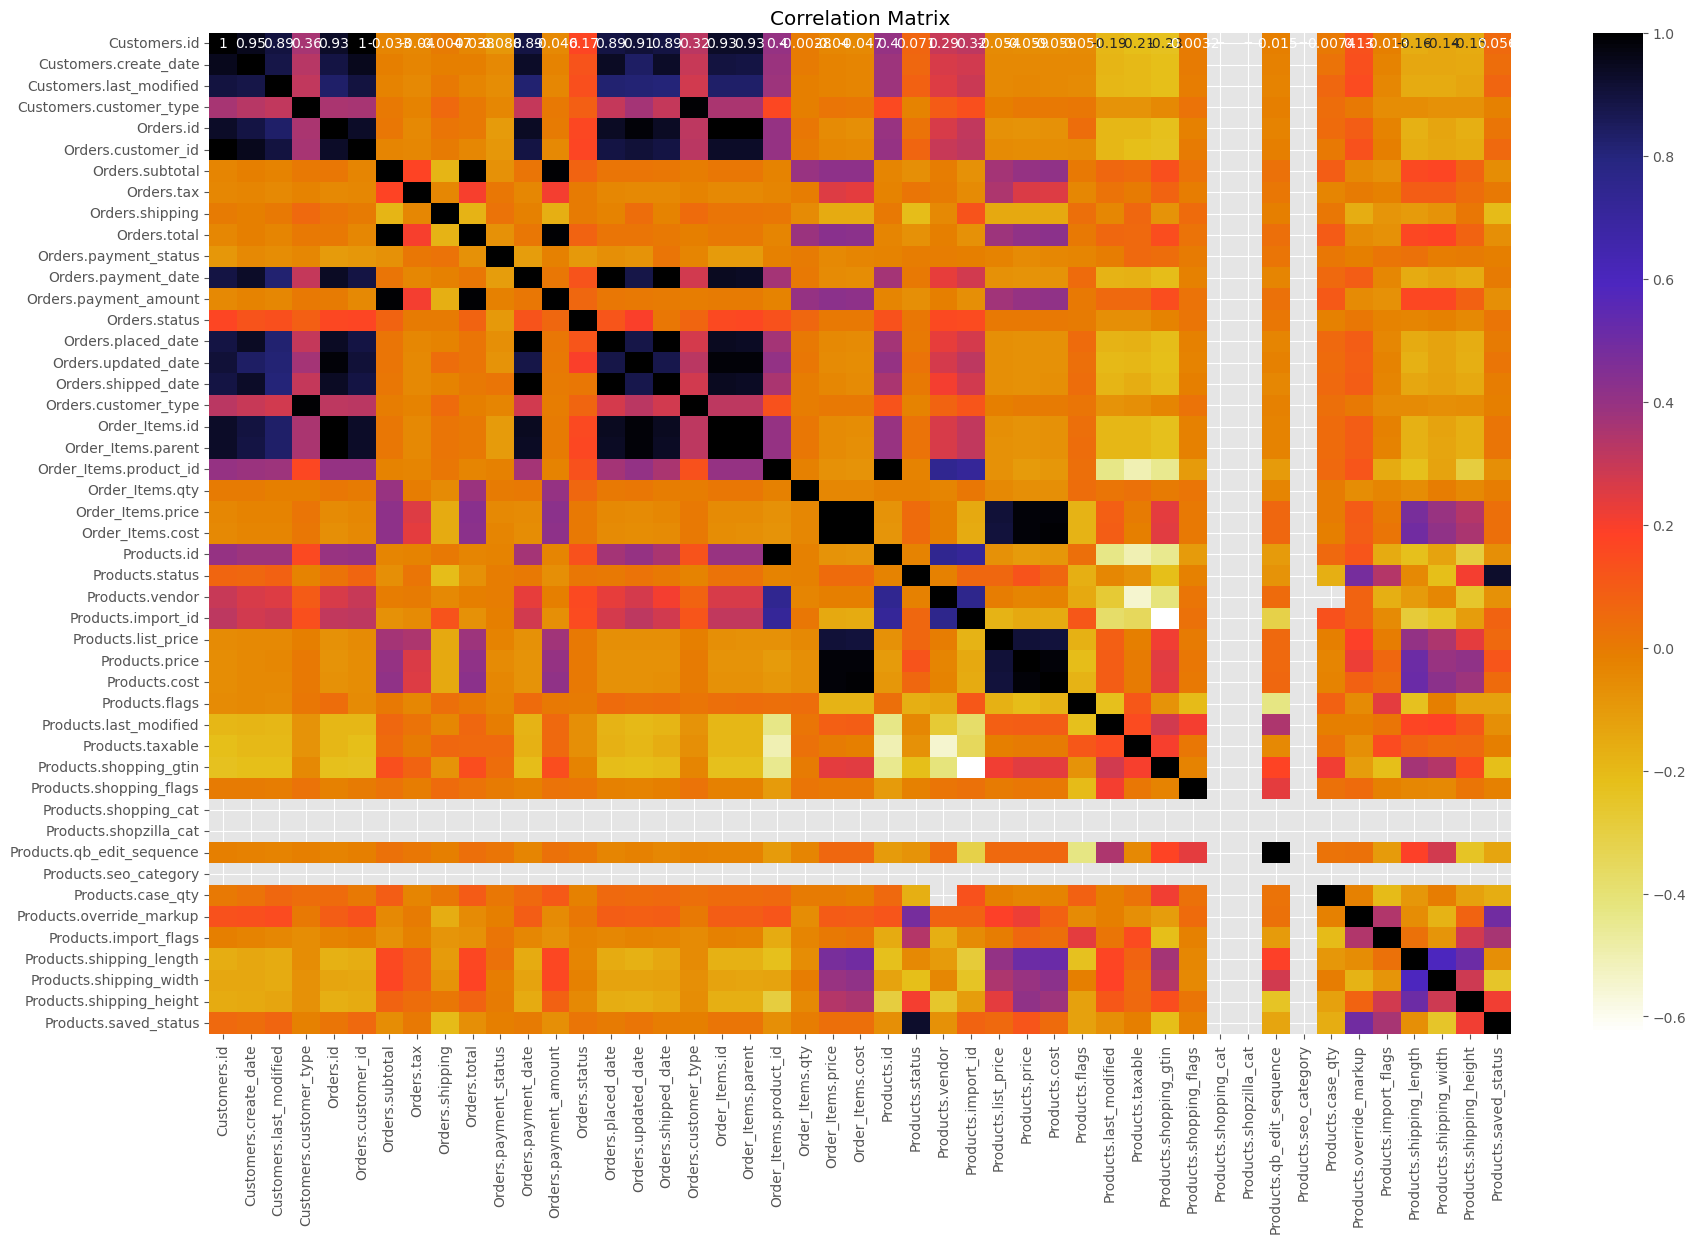

In [36]:
plt.figure(figsize=(21,13))
plt.title("Correlation Matrix")
plt.xticks(rotation=90)
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="viridis");

## Handling Missing Values

In [19]:
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

In [21]:
categoric_columns = df.select_dtypes(include=["object"]).columns
df[categoric_columns] = df[categoric_columns].fillna(df[categoric_columns].mode().iloc[0])

In [22]:
df.isnull().sum()

Customers.id                     0
Customers.fname                  0
Customers.lname                  0
Customers.create_date            0
Customers.last_modified          0
Customers.customer_type          0
Orders.id                        0
Orders.customer_id               0
Orders.fname                     0
Orders.lname                     0
Orders.order_number              0
Orders.currency                  0
Orders.subtotal                  0
Orders.tax                       0
Orders.shipping                  0
Orders.total                     0
Orders.shipping_carrier          0
Orders.shipping_method           0
Orders.tracking                  0
Orders.payment_status            0
Orders.payment_date              0
Orders.payment_type              0
Orders.payment_amount            0
Orders.payment_id                0
Orders.payment_code              0
Orders.status                    0
Orders.placed_date               0
Orders.updated_date              0
Orders.shipped_date 

##  Calculate find the most popular product using maximum sales by volume and dollar amount

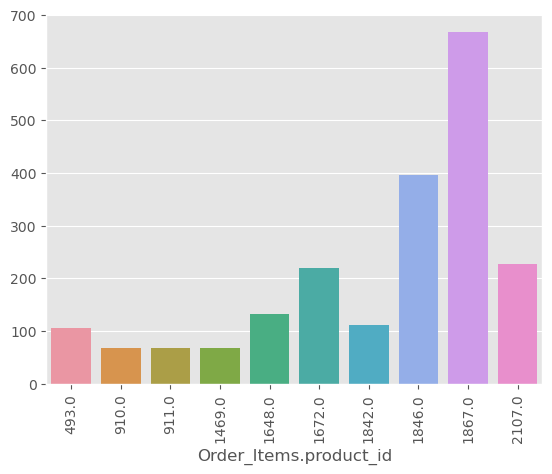

In [33]:
sales = df.groupby("Order_Items.product_id")["Order_Items.qty"].sum()
df_popular = sales.nlargest(10)

plt.xticks(rotation=90)
sns.barplot(x=df_popular.index, y=df_popular.values);

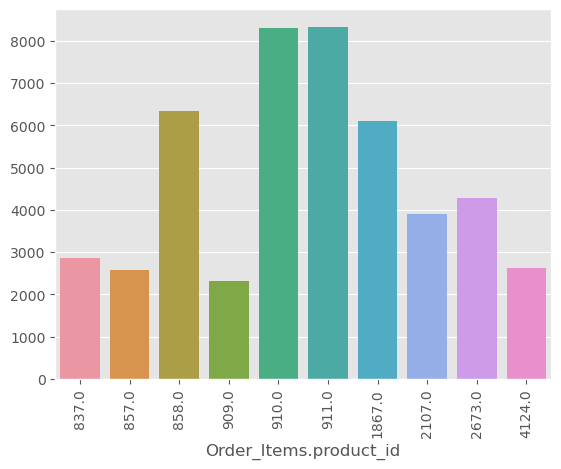

In [37]:
sales_price = df.groupby('Order_Items.product_id')["Order_Items.price"].sum()
df_popular_price = sales_price.nlargest(10)

plt.xticks(rotation=90)
sns.barplot(x = df_popular_price.index, y = df_popular_price.values);

##  Company with a maximum purchase

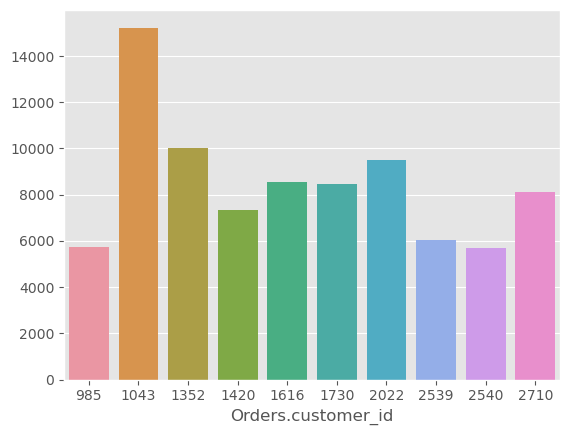

In [41]:
company_purchases = df.groupby("Orders.customer_id")["Orders.total"].sum()
company_max_purchases = company_purchases.nlargest(10)

sns.barplot(x = company_max_purchases.index, y = company_max_purchases.values);

##  Build a popularity-based recommender system

In [60]:
cols = ["Customers.id", "Order_Items.product_id", "Customers.fname", "Orders.total","Orders.payment_amount","Order_Items.qty","Order_Items.price","Order_Items.cost","Products.id","Products.name","Products.list_price","Products.price"]
df_cols = df[cols]
df_cols.sample(3)

,Customers.id,Order_Items.product_id,Customers.fname,Orders.total,Orders.payment_amount,Order_Items.qty,Order_Items.price,Order_Items.cost,Products.id,Products.name,Products.list_price,Products.price
990,833,1236.0,Debbie,92.42,92.42,1,82.47,63.44,1236.0,"Remedy Olivamine Foaming Body Cleanser,9.000 OZ",116.35,83.110
3881,3424,10597.0,Vickie,76.25,76.25,1,66.30,50.61,10597.0,Exuderm RCD Hydrocolloid,132.86,66.300
842,695,4347.0,Charles,190.76,190.76,4,34.99,24.99,1867.0,"Emesis Bags,Blue,36.000 OZ",72.33,48.245


### most popular customer that has order quantity.

In [46]:
qty_per_customer = df_cols.groupby("Customers.id").agg({"Order_Items.qty":[np.size, np.sum, np.mean]})
qty_per_customer

Order_Items.qty         
                        size sum mean
Customers.id                         
3                          2   5  2.5
4                          1   1  1.0
5                          3   3  1.0
7                          1   1  1.0
8                          1   1  1.0
...                      ...  ..  ...
3730                       1   1  1.0
3732                       1   1  1.0
3733                       1   1  1.0
3735                       1   1  1.0
3736                       1   2  2.0

[3054 rows x 3 columns]

In [50]:
popular_customers = qty_per_customer.sort_values(("Order_Items.qty","mean"),ascending=False)
popular_customers = popular_customers.nlargest(10, ("Order_Items.qty","mean"))
popular_customers


Order_Items.qty            
                        size  sum   mean
Customers.id                            
3174                       2  505  252.5
442                        2  220  110.0
3006                       2  133   66.5
1937                       1   40   40.0
1352                      10  300   30.0
2291                       1   26   26.0
733                        1   24   24.0
408                        1   24   24.0
1208                       1   22   22.0
1513                       1   20   20.0

### most popular products by price

In [53]:
products = df_cols.groupby("Products.id").agg({"Products.price":[np.size, np.sum, np.mean]})
products

Products.price                
                      size     sum    mean
Products.id                               
1.0                      1   68.78   68.78
19.0                     2   91.08   45.54
20.0                     2  200.20  100.10
22.0                     1   29.00   29.00
30.0                     3  114.87   38.29
...                    ...     ...     ...
25612.0                  1   19.80   19.80
25694.0                  1   22.48   22.48
25908.0                  1   52.40   52.40
25920.0                  1   26.10   26.10
26175.0                  1   74.67   74.67

[1710 rows x 3 columns]

In [54]:
popular_products = products.sort_values(("Products.price", "mean"), ascending=False)
popular_products = popular_products.nlargest(10, ("Products.price", "mean"))
popular_products

Products.price                  
                      size      sum     mean
Products.id                                 
2746.0                   1  1899.00  1899.00
3027.0                   1  1899.00  1899.00
2671.0                   1  1475.00  1475.00
2724.0                   1  1199.00  1199.00
2723.0                   1  1149.00  1149.00
2707.0                   1  1099.00  1099.00
4625.0                   1  1043.75  1043.75
4680.0                   2  1710.28   855.14
2553.0                   1   800.00   800.00
15809.0                  1   787.50   787.50

## Build a recommender system using matrix factorization

In [82]:
matrix = df_cols.pivot_table(index="Products.id", 
                                           columns="Products.name", 
                                           values="Orders.total"
                                           ).fillna(0).astype(int)

matrix.head()

Products.name,1 Box Of Medline Commode Liners with Absorbent Pad,"1-Ply Blockade AngelStat Surgical Gowns,Ceil Blue,Extra Large","1/2"" self-adhesive hook material, 25 yard dispenser box, white","1/2"" self-adhesive loop material, 25 yard dispenser box, white","100% Cotton Unisex Reversible Hyperbaric Scrub Tops,Misty Green,MZS","100% Cotton Unisex Reversible Tops,Ceil Blue,MHS","18"" Hamper Stands,Standard","2"" self-adhesive loop material, 10 yard dispenser box, tan","2"" self-adhesive loop material, 25 yard dispenser box, tan","2-Ply Tissue/Poly Professional Towels,Not Applicable",2000 Wheelchairs,"24 Hour Urine Collection Bottle,3000.0 ML","3 Pack, Hospital Receiving Blankets, Baby Blankets, 100% Cotton, 30x40, Elephant","3 Pack, Hospital Receiving Blankets, Baby Blankets, 100% Cotton, 34x40, Footprints",3 Wheel Walker Rollator with Basket Tray and Pouch,"3"" Wheels For Walkers","3/4"" Guardian Utility Tips,Gray","5"" Wheels For Walkers",6 Cylinder Oxygen Carrier,6-spring hand grip (each),"8"" Rear Walker Wheel Attachment","A&D Ointment by H & H Laboratories Inc,384.00 ML",Accu-Therm Hot/Cold Gel Packs,Accu-Therm Insulated Hot Pack,Accu-Therm Non-Insulated Hot Pack,"Accutouch Chemo Nitrile Exam Gloves,Blue,Medium","Active Liquid Protein Nutritional Supplement,30.000 OZ",AcuForce&reg; 7.0 Massage Tool,"Addipak Sterile Saline Solution,3.00 ML",Adjustable Angle Rotating Suction Cup Grab Bar,Adjustable Height Bathtub Grab Bar Safety Rail,Adjustable Height Home Bed Assist Handle,"Adjustable Height Rollator with 6"" Wheels",Adjustable Height Teak Bath Bench Stool,Adjustable Lightweight Folding Cane with Gel Hand Grip,Adult Bariatric Crutches,"AdvanTrode&reg; Elite Electrode, 2"" round, tan tricot, 40/box","Advantage Magnetic Patient Alarms,Yellow",Advantage Therapeutic Homecare Foam Mattress,Aero-Pulse Pressure Pads,Aeroflow II Wheelchair Cushions,Aeromist Plus Nebulizer Compressor with Disposable Nebulizer Kit,All Purpose Rolling Shopping Utility Cart,"Aloetouch 3G Powder-Free Latex-Free Synthetic Exam Gloves,Large","Aloetouch 3G Powder-Free Latex-Free Synthetic Exam Gloves,Medium","Aloetouch 3G Powder-Free Latex-Free Synthetic Exam Gloves,Small","Aloetouch 3G Powder-Free Latex-Free Synthetic Exam Gloves,X-Large","Aloetouch Extended Cuff Chemo Nitrile Exam Gloves,Green,Medium","Aloetouch Extended Cuff Chemo Nitrile Exam Gloves,Green,Small","Aloetouch Extended Cuff Chemo Nitrile Exam Gloves,Green,X-Large",Aloetouch PROTECT Dimethicone Skin Protectant Wipes,Aloetouch Personal Cleansing Wipes,"Aloetouch Powder-Free Latex Exam Gloves,Green,X-Small",Aloetouch SELECT Premium Spunlace Personal Cleansing Wipes,Aloetouch Sensitive Personal Cleansing Baby Wipes,"Aloetouch Ultra IC Powder-Free Latex-Free Synthetic Exam Gloves,Large","Aloetouch Ultra IC Powder-Free Latex-Free Synthetic Exam Gloves,Medium",Aluminum Bath Benches with Back,Aluminum Bath Benches without Back,Aluminum Folding Commode with Padded Armrests,Aluminum Forearm Crutches,"Aluminum Quad Canes,Black","Aluminum Quad Canes,Chrome",Aluminum Rollator with Fold Up and Removable Back Support and Padded Seat,Aluminum Shower Commode Mobile Chair,"Aluminum Transport Chair with 12"" Wheels,Blue,F: 8 R: 12","Aluminum Transport Chair with 12"" Wheels,Red,F: 8 R: 12","Aluminum Transport Chair with 8"" Wheels,Blue,F: 8 R: 8","Aluminum Transport Chair with 8"" Wheels,Red,F: 8 R: 8","AngelStat Ladies Elastic with Draw Cord Scrub Pants,Ceil Blue,NTH","AngelStat Ladies Elastic with Draw Cord Scrub Pants,Hunter Green,NHG","AngelStat Ladies Elastic with Draw Cord Scrub Pants,Navy Blue,NNT","AngelStat Unisex Elastic Waist Cargo Scrub Pants,Hunter Green,NHG","AngelStat Unisex Reversible Drawstring Scrub Pants,Jade Green,NTJ","AngelStat Unisex Reversible Drawstring Scrub Pants,Misty Green,NTZ","AngelStat Unisex Reversible V-Neck Scrub Tops,Misty Green,NTZ",Ankle Prompts for Trekker Gait Trainer,Anti Tippers with Wheels,Antiseptic Towelettes,"Aquasonic&reg; 100 ultrasonic gel, 250ml (8.5 oz) di

In [86]:
df_cols.groupby("Products.name").agg({"Order_Items.qty":[np.size, np.sum, np.mean],
"Order_Items.price":[np.size, np.sum, np.mean], "Orders.total":[np.size, np.sum, np.mean]})

Order_Items.qty           \
                                                              size sum mean   
Products.name                                                                 
1 Box Of Medline Commode Liners with Absorbent Pad               1   2  2.0   
1-Ply Blockade AngelStat Surgical Gowns,Ceil Bl...               1   1  1.0   
1/2" self-adhesive hook material, 25 yard dispe...               1   1  1.0   
1/2" self-adhesive loop material, 25 yard dispe...               1   1  1.0   
100% Cotton Unisex Reversible Hyperbaric Scrub ...               2   3  1.5   
...                                                            ...  ..  ...   
Youth-Sized Walker Platform Attachment                           1   1  1.0   
Zip-Style Biohazard Specimen Bags,Clear                          1   1  1.0   
iWalker Euro Style Rollator                                      1   1  1.0   
sEMG - MyoTrac Home Trainer with Myoscan Active...               1   1  1.0   
sEMG - single use uni-gel electrodes only, case...               1   1  1.0   

                                                   Order_Items.price          \
                                                                size     sum   
Products.name                                                                  
1 Box Of Medline Commode Liners with Absorbent Pad                 1   18.99   
1-Ply Blockade AngelStat Surgical Gowns,Ceil Bl...                 1  235.05   
1/2" self-adhesive hook material, 25 yard dispe...                 1   23.25   
1/2" self-adhesive loop material, 25 yard dispe...                 1   23.25   
100% Cotton Unisex Reversible Hyperbaric Scrub ...                 2   36.54   
...                                                              ...     ...   
Youth-Sized Walker Platform Attachment                             1   51.71   
Zip-Style Biohazard Specimen Bags,Clear                            1   48.41   
iWalker Euro Style Rollator                                        1  169.99   
sEMG - MyoTrac Home Trainer with Myoscan Active...                 1  481.25   
sEMG - single use uni-gel electrodes only, case...                 1   39.20   

                                                           Orders.total  \
                                                      mean         size   
Products.name                                                             
1 Box Of Medline Commode Liners with Absorbent Pad   18.99            1   
1-Ply Blockade AngelStat Surgical Gowns,Ceil Bl...  235.05            1   
1/2" self-adhesive hook material, 25 yard dispe...   23.25            1   
1/2" self-adhesive loop material, 25 yard dispe...   23.25            1   
100% Cotton Unisex Reversible Hyperbaric Scrub ...   18.27            2   
...                                                    ...          ...   
Youth-Sized Walker Platform Attachment               51.71            1   
Zip-Style Biohazard Specimen Bags,Clear              48.41            1   
iWalker Euro Style Rollator                         169.99            1   
sEMG - MyoTrac Home Trainer with Myoscan Active...  481.25            1   
sEMG - single use uni-gel electrodes only, case...   39.20            1   

                                                                    
                                                       sum    mean  
Products.name                                                       
1 Box Of Medline Commode Liners with Absorbent Pad   37.98   37.98  
1-Ply Blockade AngelStat Surgical Gowns,Ceil Bl...  235.05  235.05  
1/2" self-adhesive hook material, 25 yard dispe...   55.81   55.81  
1/2" self-adhesive loop material, 25 yard dispe...   55.81   55.81  
100% Cotton Unisex Reversible Hyperbaric Scrub ...  134.98   67.49  
...                                                    ...     ...  
Youth-Sized Walker Platform Attachment               61.66   61.66  
Zip-Style Biohazard Specimen Bags,Clear              58.36   58.36  
iWalker Euro 

In [83]:
product1 = matrix["1 Box Of Medline Commode Liners with Absorbent Pad"]
product1.head()

Products.id
1.0     0
19.0    0
20.0    0
22.0    0
30.0    0
Name: 1 Box Of Medline Commode Liners with Absorbent Pad, dtype: int32

In [84]:
product1.nunique()

2

In [85]:
product1.value_counts()

1 Box Of Medline Commode Liners with Absorbent Pad
0     1709
37       1
Name: count, dtype: int64

In [87]:
matrix[["1 Box Of Medline Commode Liners with Absorbent Pad","1-Ply Blockade AngelStat Surgical Gowns,Ceil Blue,Extra Large"]].corr()

Products.name,1 Box Of Medline Commode Liners with Absorbent Pad,"1-Ply Blockade AngelStat Surgical Gowns,Ceil Blue,Extra Large"
Products.name,,
1 Box Of Medline Commode Liners with Absorbent Pad,1.000000,-0.000585
"1-Ply Blockade AngelStat Surgical Gowns,Ceil Blue,Extra Large",-0.000585,1.000000


In [88]:
product_df = pd.DataFrame()

product_df["product"] = matrix.corrwith(product1)
product_df["correlation"] = matrix.corrwith(product1, method="spearman").values
product_df.sort_values(("correlation"), ascending=False)

,product,correlation
Products.name,,
1 Box Of Medline Commode Liners with Absorbent Pad,1.000000,1.000000
"Pediatric Non-Folding Walker,3""",-0.000585,-0.000585
"Phoenix Heavy Duty Power Scooter, 4 Wheel",-0.000585,-0.000585
"Phoenix Heavy Duty Power Scooter, 3 Wheel",-0.000585,-0.000585
"Philadelphia Atlas Cervical Collars,Regular",-0.000585,-0.000585
...,...,...
Extra-Wide Wheelchairs,-0.001430,-0.001435
ReadyFlush Biodegradable Flushable Wipes,-0.001297,-0.001435
Gel Foam Pressure Redistribution Cushions,-0.001484,-0.001551


## Cosine similarity for product description

## KNN

In [89]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
sparse_matrix=vect.fit_transform(df)

In [92]:
matrix = sparse_matrix.todense()
df = pd.DataFrame(matrix, columns=vect.get_feature_names_out())
df

,amazon_asin,amazon_item_type,case_qty,cost,create_date,currency,customer_id,customer_type,customers,display_name,family_id,flags,fname,google_shopping_cat,google_shopping_id,google_shopping_type,hcpcs,id,import_flags,import_id,last_modified,list_price,lname,long_description,multiple,name,order_items,order_number,orders,override_markup,packaging,parent,payment_amount,payment_code,payment_date,payment_id,payment_status,payment_type,placed_date,price,pricegrabber_cat,product_id,product_name,products,qb_edit_sequence,qty,quickbooks_id,saved_status,seo_category,seo_title,seo_url,shipped_date,shipping,shipping_carrier,shipping_height,shipping_length,shipping_method,shipping_width,shopping_brand,shopping_cat,shopping_flags,shopping_gtin,shopping_mpn,shopping_type,shopzilla_cat,short_description,status,subtotal,tax,taxable,template,thefind_cat,total,tracking,unit,updated_date,vendor
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [93]:
df.shape

(83, 77)

In [94]:
from sklearn.metrics.pairwise import cosine_similarity

In [95]:
pd.DataFrame(cosine_similarity(df,df))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82
0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,1.0,0.5,0.5,0.5,0.5,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.5,1.0,0.5,0.5,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5,0.5,0.5,1.0,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.5,0.5,0.5,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.5,0.5,0.5,0.5,0.5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.5,0.0,0.0,0.0,0.0,0.0,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.5,0.0,0.0,0.0,0.0,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.5,0.0,0.0,0.0,0.5,0.5,0.5,1.0,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
